In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
from ipywidgets import interact
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas

In [127]:

# Load dataset

Efficient_df = pd.read_csv("CollaborativeProject1/portfolio.csv", parse_dates=True, index_col="ticker")
#Tickers= Effiecient_df[['COG','GIS','GPC','SYF']]

# back out volatility by using sharpe ratios and returns
Efficient_df['vol'] = Efficient_df['sharpe ratio'] * Efficient_df['FFM returns']


Efficient_df.head()

,name,sector,sharpe ratio,FFM returns,P/E ratio,EPS,beta,mkt cap,shares,vol
ticker,,,,,,,,,,
GPC,Genuine Parts,Consumer Discretionary,2.924464,0.074228,17.71,5.45,0.89,14016415887,145293000,0.217077
GIS,General Mills,Consumer Staples,2.641281,0.063147,15.34,3.48,0.73,32242795100,604817000,0.166789
COG,Cabot Oil & Gas,Energy,1.952983,-0.050017,7.80,1.90,0.47,6037284157,407925000,-0.097682
SYF,Synchrony Financial,Financials,2.493336,0.091836,6.07,5.56,1.21,20704848750,613477000,0.228978
AMGN,Amgen Inc,Health Care,1.861649,0.151749,17.36,12.88,1.12,131810065840,589807000,0.282503


In [168]:
np.random.seed(42)
num_portfolios = 30_000

In [169]:
all_weights = np.zeros((num_portfolios, len(Efficient_df.index)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

In [170]:
# populate the empty lists with each portfolios returns,risk and weight

all_weights = np.zeros((num_portfolios, len(Efficient_df.index)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

In [171]:
    for x in range(num_portfolios):
        # produce random values for each stock
        weights = np.array(np.random.random(len(Efficient_df.index)))

        # get weights for each stock by normalizing sum to 1
        weights = weights/np.sum(weights)

        # store weights for portfolio
        all_weights[x,:] = weights

        # store returns for portfolio
        ret_arr[x] = np.sum(Efficient_df['FFM returns'] * weights)

        # get vol
        vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(Efficient_df['FFM returns'].cov(
            Efficient_df['FFM returns']), weights)))

        # get portfolio sharpe
        sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [197]:
        
    #print(all_weights[1462,:])
   

In [176]:
max_sharp_return= ret_arr[sharpe_arr.argmax()]
max_sharp_vol= vol_arr[sharpe_arr.argmax()]

In [198]:
    #sum(all_weights[1462,:])

In [179]:
    min_sharp_return= ret_arr[sharpe_arr.argmin()]
    min_sharp_vol= vol_arr[sharpe_arr.argmin()]

In [180]:
portfolio = {'Returns': ret_arr,
         'Volatility': vol_arr,
         'Sharpe Ratio': sharpe_arr}

In [188]:
 df = pd.DataFrame(portfolio)

    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in Efficient_df.index]

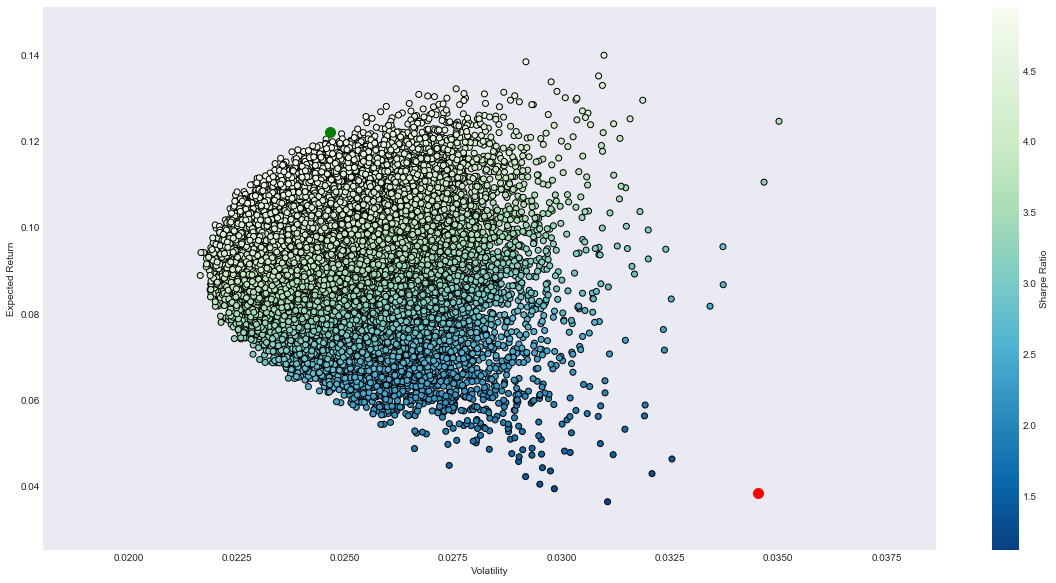

In [196]:
    plt.style.use('seaborn-dark')
    plt.figure(figsize=(20,10))
    plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='GnBu_r',edgecolors='black')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Expected Return')
    plt.scatter(max_sharp_vol, max_sharp_return,c='green', s=100)
    plt.scatter(min_sharp_vol, min_sharp_return,c='red', s=100) # red dot

    
plt.show()